In [2]:
import pandas as pd
import sys
import os

In [3]:
datos_limpios = pd.read_csv("datos_limpios_pro.csv")

In [4]:
datos_limpios # Agregar la columna color -> pantone ; *sucursal ; diseño

,codigo,descrip,cod_sector,fecha,design,pantone,nombre_color,cantidad,suc,temporada_venta
0,B0001,JERSEY ELIZABETH,101,2021-02-05,No definido,13-1022,CORAL CARAMELO CREMA,1.50,5,Primavera-Verano
1,B0001,JERSEY ELIZABETH,101,2021-06-21,No definido,13-1022,CORAL CARAMELO CREMA,0.90,5,Otonho-Invierno
2,B0001,JERSEY ELIZABETH,101,2022-12-09,No definido,14-0244,VERDE LIMA BRILLANTE,1.00,30,Primavera-Verano
3,B0001,JERSEY ELIZABETH,101,2022-12-19,No definido,14-0244,VERDE LIMA BRILLANTE,2.00,30,Primavera-Verano
4,B0001,JERSEY ELIZABETH,101,2023-02-08,No definido,14-0244,VERDE LIMA BRILLANTE,1.14,30,Primavera-Verano
...,...,...,...,...,...,...,...,...,...,...
1844706,S0286,FIBRANA CREPE ESTAMPADA,104,2023-08-21,FLORAL,19-4010,AZUL ECLIPSE TOTAL,5.00,4,Otonho-Invierno
1844707,S0286,FIBRANA CREPE ESTAMPADA,104,2023-08-22,FLORAL,19-4010,AZUL ECLIPSE TOTAL,2.00,4,Otonho-Invierno
1844708,S0286,FIBRANA CREPE ESTAMPADA,104,2023-08-18,HOJAS,19-4025,AZUL INDIGO MOOD,2.00,1,Otonho-Invierno
1844709,S0286,FIBRANA CREPE ESTAMPADA,104,2023-08-19,HOJAS,19-4025,AZUL INDIGO MOOD,0.70,1,Otonho-Invierno


In [5]:
datos_limpios.columns
datos_limpios["cod_sector"].unique()

array([101, 102, 103, 104], dtype=int64)

In [6]:
cantidad_nan_en_descrip = datos_limpios['descrip'].isna().sum()
print(f"La cantidad de valores NaN a eliminar son: {cantidad_nan_en_descrip}")
datos_limpios= datos_limpios.dropna()

La cantidad de valores NaN a eliminar son: 0


In [7]:
cantidad_nan_total =datos_limpios.isna().sum()
print(f"La cantidad total de valores NaN en el DataFrame es: {cantidad_nan_total}")

La cantidad total de valores NaN en el DataFrame es: codigo             0
descrip            0
cod_sector         0
fecha              0
design             0
pantone            0
nombre_color       0
cantidad           0
suc                0
temporada_venta    0
dtype: int64


In [8]:
datos_limpios["descrip"].unique().shape

(849,)

In [9]:
productos_mas_vendidos = datos_limpios.groupby('descrip')['cantidad'].sum().reset_index()

# Ordenar el DataFrame por la cantidad de mayor a menor
productos_mas_vendidos = productos_mas_vendidos.sort_values(by='cantidad', ascending=False)
productos_mas_vendidos.iloc[2]


descrip     TROPICAL MECANICO LISO
cantidad                1153865.51
Name: 791, dtype: object

In [10]:
print("Tabla de productos más vendidos:")
productos_mas_vendidos
round(productos_mas_vendidos.iloc[842]["cantidad"])

Tabla de productos más vendidos:


1

# Analisis estaistico 

In [11]:
# Encontrar la compra individual con mayor cantidad
compra_maxima = datos_limpios.loc[datos_limpios['cantidad'].idxmax()]
compra_maxima

codigo                                H0201
descrip            ACCESORIO CINTA TAPIZADO
cod_sector                              102
fecha                            2021-07-16
design                                 LISO
pantone                             19-4057
nombre_color                           AZUL
cantidad                            1064.36
suc                                       5
temporada_venta             Otonho-Invierno
Name: 729258, dtype: object

In [12]:
# Calcular la cantidad de la mediana de la compra
cantidad_mediana = round(productos_mas_vendidos['cantidad'].median(),3)
cantidad_mediana

795.41

In [13]:
# Calcular la cantidad promedio de la compra
cantidad_promedio = round(productos_mas_vendidos['cantidad'].mean(),3)
cantidad_promedio

18704.932

In [14]:
# Calcular la cantidad moda de la compra
cantidad_moda = round(productos_mas_vendidos["cantidad"].mode(),3)
cantidad_moda

0    1.0
Name: cantidad, dtype: float64

In [15]:
# Encontrar la compra individual con menor cantidad
compra_minima = datos_limpios.loc[datos_limpios['cantidad'].idxmin()]
compra_minima

codigo                       C0051
descrip                SCUBA CREPE
cod_sector                     103
fecha                   2023-03-18
design                        LISO
pantone                    19-4008
nombre_color       NEGRO METEORITO
cantidad                      0.03
suc                             30
temporada_venta    Otonho-Invierno
Name: 917947, dtype: object

In [16]:
datos_limpios.shape

(1844710, 10)

In [17]:
suma_ventas_por_tela = datos_limpios.groupby('descrip')['cantidad'].sum()

# Filtrar las telas cuya suma total de ventas sea menor a 5
telas_a_eliminar = suma_ventas_por_tela[suma_ventas_por_tela < 795].index

# Contar la cantidad de filas que serán eliminadas
filas_eliminadas = datos_limpios[datos_limpios['descrip'].isin(telas_a_eliminar)].shape[0]

# Eliminar las filas correspondientes a las telas a eliminar
datos_limpios = datos_limpios[~datos_limpios['descrip'].isin(telas_a_eliminar)]

# Imprimir el DataFrame resultante y la cantidad de filas eliminadas
print("DataFrame después de eliminar telas con suma de ventas menor a 5:")
print(f"Se eliminaron {filas_eliminadas} filas.")

DataFrame después de eliminar telas con suma de ventas menor a 5:
Se eliminaron 37123 filas.


In [18]:
datos_limpios["descrip"].unique().shape

(425,)

In [19]:
top_tela = productos_mas_vendidos.head(1)['descrip']

# Filtrar el DataFrame original para incluir solo las filas de la tela más vendida
datos_top1_tela = datos_limpios[datos_limpios['descrip'].isin(top_tela)]

# Imprimir el DataFrame resultante con los datos de las 5 telas más vendidas
print("DataFrame con datos de la tela más vendida:")
datos_top1_tela

DataFrame con datos de la tela más vendida:


,codigo,descrip,cod_sector,fecha,design,pantone,nombre_color,cantidad,suc,temporada_venta
1679672,S0180,DIOLEN LISO,104,2022-07-29,LISO,19-3952,AZUL SURF,1.40,25,Otonho-Invierno
1679673,S0180,DIOLEN LISO,104,2021-09-08,LISO,19-4008,NEGRO METEORITO,3.00,1,Primavera-Verano
1679674,S0180,DIOLEN LISO,104,2021-09-08,LISO,19-4008,NEGRO METEORITO,1.20,1,Primavera-Verano
1679675,S0180,DIOLEN LISO,104,2021-09-09,LISO,19-4008,NEGRO METEORITO,2.00,1,Primavera-Verano
1679676,S0180,DIOLEN LISO,104,2021-09-11,LISO,19-4008,NEGRO METEORITO,20.00,1,Primavera-Verano
...,...,...,...,...,...,...,...,...,...,...
1782187,S0180,DIOLEN LISO,104,2021-04-15,LISO,19-3952,AZUL SURF,1.10,2,Otonho-Invierno
1782188,S0180,DIOLEN LISO,104,2023-07-31,LISO,19-4008,NEGRO METEORITO,2.50,4,Otonho-Invierno
1782189,S0180,DIOLEN LISO,104,2023-08-01,LISO,19-4008,NEGRO METEORITO,2.50,4,Otonho-Invierno
1782190,S0180,DIOLEN LISO,104,2023-08-01,LISO,19-4008,NEGRO METEORITO,2.00,4,Otonho-Invierno


In [20]:
datos_top1_tela.columns

Index(['codigo', 'descrip', 'cod_sector', 'fecha', 'design', 'pantone',
       'nombre_color', 'cantidad', 'suc', 'temporada_venta'],
      dtype='object')

In [21]:
datos_limpios['fecha'] = pd.to_datetime(datos_limpios['fecha'])

# Crear la nueva columna 'anho'
datos_limpios['anho'] = datos_limpios['fecha'].dt.year

# Mostrar el DataFrame resultante
datos_limpios

,codigo,descrip,cod_sector,fecha,design,pantone,nombre_color,cantidad,suc,temporada_venta,anho
0,B0001,JERSEY ELIZABETH,101,2021-02-05,No definido,13-1022,CORAL CARAMELO CREMA,1.50,5,Primavera-Verano,2021
1,B0001,JERSEY ELIZABETH,101,2021-06-21,No definido,13-1022,CORAL CARAMELO CREMA,0.90,5,Otonho-Invierno,2021
2,B0001,JERSEY ELIZABETH,101,2022-12-09,No definido,14-0244,VERDE LIMA BRILLANTE,1.00,30,Primavera-Verano,2022
3,B0001,JERSEY ELIZABETH,101,2022-12-19,No definido,14-0244,VERDE LIMA BRILLANTE,2.00,30,Primavera-Verano,2022
4,B0001,JERSEY ELIZABETH,101,2023-02-08,No definido,14-0244,VERDE LIMA BRILLANTE,1.14,30,Primavera-Verano,2023
...,...,...,...,...,...,...,...,...,...,...,...
1844706,S0286,FIBRANA CREPE ESTAMPADA,104,2023-08-21,FLORAL,19-4010,AZUL ECLIPSE TOTAL,5.00,4,Otonho-Invierno,2023
1844707,S0286,FIBRANA CREPE ESTAMPADA,104,2023-08-22,FLORAL,19-4010,AZUL ECLIPSE TOTAL,2.00,4,Otonho-Invierno,2023
1844708,S0286,FIBRANA CREPE ESTAMPADA,104,2023-08-18,HOJAS,19-4025,AZUL INDIGO MOOD,2.00,1,Otonho-Invierno,2023
1844709,S0286,FIBRANA CREPE ESTAMPADA,104,2023-08-19,HOJAS,19-4025,AZUL INDIGO MOOD,0.70,1,Otonho-Invierno,2023


# Procedemos a separar los datos en temporada para su posterior entrenamiento

In [22]:
df_otono_invierno = datos_limpios[datos_limpios['temporada_venta'] == 'Otonho-Invierno']
df_primavera_verano = datos_limpios[datos_limpios['temporada_venta'] == 'Primavera-Verano']

temporada otoño-Invierno

In [23]:
df_otono_invierno

,codigo,descrip,cod_sector,fecha,design,pantone,nombre_color,cantidad,suc,temporada_venta,anho
1,B0001,JERSEY ELIZABETH,101,2021-06-21,No definido,13-1022,CORAL CARAMELO CREMA,0.90,5,Otonho-Invierno,2021
5,B0001,JERSEY ELIZABETH,101,2021-03-04,LISO,00-0000,SIN COLOR,1.00,30,Otonho-Invierno,2021
8,B0001,JERSEY ELIZABETH,101,2023-06-09,LISO,00-0000,SIN COLOR,1.30,30,Otonho-Invierno,2023
9,B0001,JERSEY ELIZABETH,101,2021-03-15,LISO,19-4008,NEGRO METEORITO,1.05,5,Otonho-Invierno,2021
10,B0001,JERSEY ELIZABETH,101,2022-08-26,LISO,11-0601,BLANCO BRILLANTE,0.20,0,Otonho-Invierno,2022
...,...,...,...,...,...,...,...,...,...,...,...
1844706,S0286,FIBRANA CREPE ESTAMPADA,104,2023-08-21,FLORAL,19-4010,AZUL ECLIPSE TOTAL,5.00,4,Otonho-Invierno,2023
1844707,S0286,FIBRANA CREPE ESTAMPADA,104,2023-08-22,FLORAL,19-4010,AZUL ECLIPSE TOTAL,2.00,4,Otonho-Invierno,2023
1844708,S0286,FIBRANA CREPE ESTAMPADA,104,2023-08-18,HOJAS,19-4025,AZUL INDIGO MOOD,2.00,1,Otonho-Invierno,2023
1844709,S0286,FIBRANA CREPE ESTAMPADA,104,2023-08-19,HOJAS,19-4025,AZUL INDIGO MOOD,0.70,1,Otonho-Invierno,2023


Temporada primavera-verano

In [24]:
df_primavera_verano

,codigo,descrip,cod_sector,fecha,design,pantone,nombre_color,cantidad,suc,temporada_venta,anho
0,B0001,JERSEY ELIZABETH,101,2021-02-05,No definido,13-1022,CORAL CARAMELO CREMA,1.50,5,Primavera-Verano,2021
2,B0001,JERSEY ELIZABETH,101,2022-12-09,No definido,14-0244,VERDE LIMA BRILLANTE,1.00,30,Primavera-Verano,2022
3,B0001,JERSEY ELIZABETH,101,2022-12-19,No definido,14-0244,VERDE LIMA BRILLANTE,2.00,30,Primavera-Verano,2022
4,B0001,JERSEY ELIZABETH,101,2023-02-08,No definido,14-0244,VERDE LIMA BRILLANTE,1.14,30,Primavera-Verano,2023
6,B0001,JERSEY ELIZABETH,101,2022-10-01,LISO,00-0000,SIN COLOR,1.00,30,Primavera-Verano,2022
...,...,...,...,...,...,...,...,...,...,...,...
1842742,S0275,TWILL PREMIUM,104,2022-10-11,LISO,11-0601,BLANCO BRILLANTE,2.00,10,Primavera-Verano,2022
1842743,S0275,TWILL PREMIUM,104,2022-12-29,LISO,11-0601,BLANCO BRILLANTE,3.00,10,Primavera-Verano,2022
1842744,S0275,TWILL PREMIUM,104,2023-02-21,LISO,11-0601,BLANCO BRILLANTE,1.60,10,Primavera-Verano,2023
1842745,S0275,TWILL PREMIUM,104,2023-01-30,LISO,11-0601,BLANCO BRILLANTE,0.70,2,Primavera-Verano,2023


Procedemos a entrenar los modelos orientados a la tela mas vendida

Se logra observar que los datos son bastante malos, pero muy probablemente se deba a la estructura que llevan, lo ideal seria que separemos el dataset en estaciones y trabajemos con cada temporada que transcurrio a lo largo de cada año, lo que nos quedaria en un bucle para cada temporada. 

Como el resultado no fue el esperado procedemos a con otro metodo:

In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# 1. Identificar los 5 productos más vendidos
top_5_products = df_otono_invierno.groupby('descrip')['cantidad'].sum().nlargest(5).index

# 2. Filtrar el DataFrame para incluir solo las filas de los 5 productos más vendidos
df_top_5 = df_otono_invierno[df_otono_invierno['descrip'].isin(top_5_products)]

# 3. Seleccionar solo las columnas relevantes ('descrip' y 'cantidad')
df_top_5 = df_top_5[['descrip', 'cantidad']]

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X_top_5 = pd.get_dummies(df_top_5['descrip'], prefix='prod')  # Solo 'descrip' se codifica, no 'cantidad'
y_top_5 = df_top_5['cantidad']

# Crear un modelo de regresión lineal
model_top_5 = LinearRegression()

# Entrenar el modelo con el conjunto de datos de los 5 productos más vendidos
model_top_5.fit(X_top_5, y_top_5)

# Realizar predicciones sobre el mismo conjunto de datos
cantidad_predicha_top_5 = model_top_5.predict(X_top_5)

# Imprimir las predicciones para los 5 productos más vendidos
print("Cantidad predicha para los 5 productos más vendidos:")
for i, producto in enumerate(top_5_products):
    print(f'Se debe comprar una cantidad de {cantidad_predicha_top_5[i]} metros de {producto} para la temporada otoño/invierno')


Cantidad predicha para los 5 productos más vendidos:
Se debe comprar una cantidad de 40.786285400390625 metros de DIOLEN LISO para la temporada otoño/invierno
Se debe comprar una cantidad de 40.786285400390625 metros de JERSEY SEDA para la temporada otoño/invierno
Se debe comprar una cantidad de 40.786285400390625 metros de TROPICAL MECANICO LISO para la temporada otoño/invierno
Se debe comprar una cantidad de 40.786285400390625 metros de ACETATO para la temporada otoño/invierno
Se debe comprar una cantidad de 40.786285400390625 metros de POLAR LISO para la temporada otoño/invierno


In [26]:
df_otono_invierno

,codigo,descrip,cod_sector,fecha,design,pantone,nombre_color,cantidad,suc,temporada_venta,anho
1,B0001,JERSEY ELIZABETH,101,2021-06-21,No definido,13-1022,CORAL CARAMELO CREMA,0.90,5,Otonho-Invierno,2021
5,B0001,JERSEY ELIZABETH,101,2021-03-04,LISO,00-0000,SIN COLOR,1.00,30,Otonho-Invierno,2021
8,B0001,JERSEY ELIZABETH,101,2023-06-09,LISO,00-0000,SIN COLOR,1.30,30,Otonho-Invierno,2023
9,B0001,JERSEY ELIZABETH,101,2021-03-15,LISO,19-4008,NEGRO METEORITO,1.05,5,Otonho-Invierno,2021
10,B0001,JERSEY ELIZABETH,101,2022-08-26,LISO,11-0601,BLANCO BRILLANTE,0.20,0,Otonho-Invierno,2022
...,...,...,...,...,...,...,...,...,...,...,...
1844706,S0286,FIBRANA CREPE ESTAMPADA,104,2023-08-21,FLORAL,19-4010,AZUL ECLIPSE TOTAL,5.00,4,Otonho-Invierno,2023
1844707,S0286,FIBRANA CREPE ESTAMPADA,104,2023-08-22,FLORAL,19-4010,AZUL ECLIPSE TOTAL,2.00,4,Otonho-Invierno,2023
1844708,S0286,FIBRANA CREPE ESTAMPADA,104,2023-08-18,HOJAS,19-4025,AZUL INDIGO MOOD,2.00,1,Otonho-Invierno,2023
1844709,S0286,FIBRANA CREPE ESTAMPADA,104,2023-08-19,HOJAS,19-4025,AZUL INDIGO MOOD,0.70,1,Otonho-Invierno,2023


In [27]:
columnas_seleccionadas = ['descrip', 'fecha', 'cantidad']
df = datos_limpios.loc[:, columnas_seleccionadas]

In [28]:
df

,descrip,fecha,cantidad
0,JERSEY ELIZABETH,2021-02-05,1.50
1,JERSEY ELIZABETH,2021-06-21,0.90
2,JERSEY ELIZABETH,2022-12-09,1.00
3,JERSEY ELIZABETH,2022-12-19,2.00
4,JERSEY ELIZABETH,2023-02-08,1.14
...,...,...,...
1844706,FIBRANA CREPE ESTAMPADA,2023-08-21,5.00
1844707,FIBRANA CREPE ESTAMPADA,2023-08-22,2.00
1844708,FIBRANA CREPE ESTAMPADA,2023-08-18,2.00
1844709,FIBRANA CREPE ESTAMPADA,2023-08-19,0.70


In [29]:
df.sort_values(by='fecha',inplace=True)

df = df[df['descrip'] == 'DIOLEN LISO']

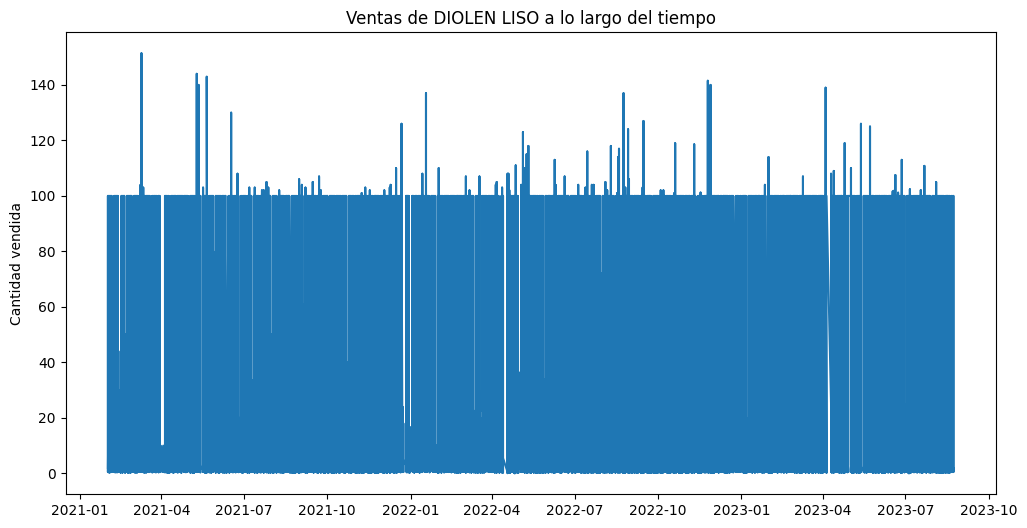

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que tu DataFrame se llama df y la columna de fecha es 'Fecha'
# y la columna de producto es 'descrip'

# Obtén la lista única de productos
productos_unicos = np.unique(df['descrip'])

# Crea gráficas para cada producto
for producto in productos_unicos:
    df_producto = df[df['descrip'] == producto]
    
    plt.figure(figsize=(12, 6))
    plt.plot(df_producto['fecha'], df_producto['cantidad'])
    plt.title(f'Ventas de {producto} a lo largo del tiempo')
    plt.xlabel('')
    plt.ylabel('Cantidad vendida')
    plt.show()


In [31]:

! pip install statsmodels


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
#Ahora vamos a empezar un ejemplo de Arima pero con un unico dato
nuevo_df = df[df['descrip'] == 'DIOLEN LISO']

# Mostrar el nuevo DataFrame
# nuevo_df 


c:\Users\navo2\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\navo2\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\navo2\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\navo2\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible startin

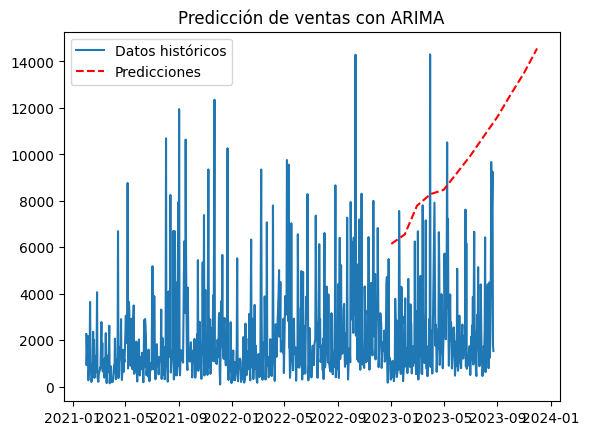

         fecha    prediccion
784 2023-01-01   6149.074088
785 2023-02-01   6555.700829
786 2023-03-01   7791.070611
787 2023-04-01   8288.827850
788 2023-05-01   8472.651398
789 2023-06-01   9211.012058
790 2023-07-01   9935.891918
791 2023-08-01  10777.289358
792 2023-09-01  11607.856666
793 2023-10-01  12555.966265
794 2023-11-01  13495.904513
795 2023-12-01  14554.438589
La predicción total para DIOLEN LISO en el año 2023 es de 119395.68414326843 metros


In [37]:
# Agrupar por fecha y sumar la cantidad para tener una serie temporal
time_series = df.groupby('fecha')['cantidad'].sum()

# Entrenar el modelo ARIMA
model = ARIMA(time_series, order=(1, 5, 10))  # Puedes ajustar los parámetros según sea necesario
fit_model = model.fit()

# Realizar la predicción para el año 2023 (12 meses)
future_dates = pd.date_range(start='2024-01-01', periods=12, freq='MS')
predictions = fit_model.get_forecast(steps=12).predicted_mean

# Crear un DataFrame con las fechas y las predicciones
predictions_df = pd.DataFrame({'fecha': future_dates, 'prediccion': predictions})

# Sumar las predicciones para el año 2023
total_prediccion_2023 = predictions_df['prediccion'].sum()

# Visualizar los resultados
plt.plot(time_series.index, time_series, label='Datos históricos')
plt.plot(predictions_df['fecha'], predictions_df['prediccion'], label='Predicciones', linestyle='--', color='red')
plt.legend()
plt.title('Predicción de ventas con ARIMA')
plt.show()

# Mostrar el DataFrame de predicciones
print(predictions_df)

# Imprimir la suma total de las predicciones para el año 2024
print(f"La predicción total para {df['descrip'].iloc[0]} en el año 2023 es de {total_prediccion_2023} metros")

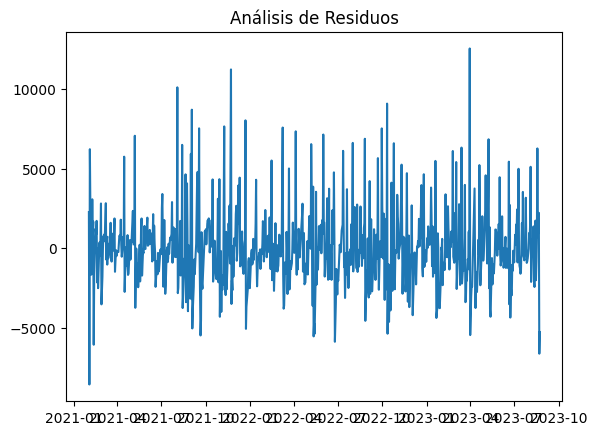

In [40]:
# Análisis de residuos
residuals = time_series - fit_model.fittedvalues
plt.plot(residuals)
plt.title('Análisis de Residuos')
plt.show()
